In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Reading and Understanding the Data

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
train_df.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
# Summary of the dataset
data_summary = {
    "Number of rows": train_df.shape[0],
    "Number of columns": train_df.shape[1],
    "Column data types": train_df.dtypes,
    "Basic statistical details": train_df.describe(include='all')
}

data_summary

{'Number of rows': 614,
 'Number of columns': 13,
 'Column data types': Loan_ID               object
 Gender                object
 Married               object
 Dependents            object
 Education             object
 Self_Employed         object
 ApplicantIncome        int64
 CoapplicantIncome    float64
 LoanAmount           float64
 Loan_Amount_Term     float64
 Credit_History       float64
 Property_Area         object
 Loan_Status           object
 dtype: object,
 'Basic statistical details':          Loan_ID Gender Married Dependents Education Self_Employed  \
 count        614    601     611        599       614           582   
 unique       614      2       2          4         2             2   
 top     LP001002   Male     Yes          0  Graduate            No   
 freq           1    489     398        345       480           500   
 mean         NaN    NaN     NaN        NaN       NaN           NaN   
 std          NaN    NaN     NaN        NaN       NaN           NaN 

In [5]:
missing_values = train_df.isnull().sum()
missing_values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Handling Missing data

By doing a simple reading of data, I can conclude that there are missing values in:

For the categorical columns `Gender`, `Married`, `Dependents`, `Self-employed`, and `Credit_History`, I am going to impute using `mode()`

For numerical columns `LoanAmount` and `Loan_Amount_Term`, I am going to impute using `median()`.

In [6]:
#Categorical columns
categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
#Numerical columns
numerical_columns = ['LoanAmount', 'Loan_Amount_Term']


for column in categorical_columns:
    train_df[column].fillna(train_df[column].mode()[0], inplace=True)
    
for column in numerical_columns:
    train_df[column].fillna(train_df[column].median(), inplace=True)
    
#Check for the remaining missing values
remaining_missing_values = train_df.isnull().sum()

remaining_missing_values

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Visualization

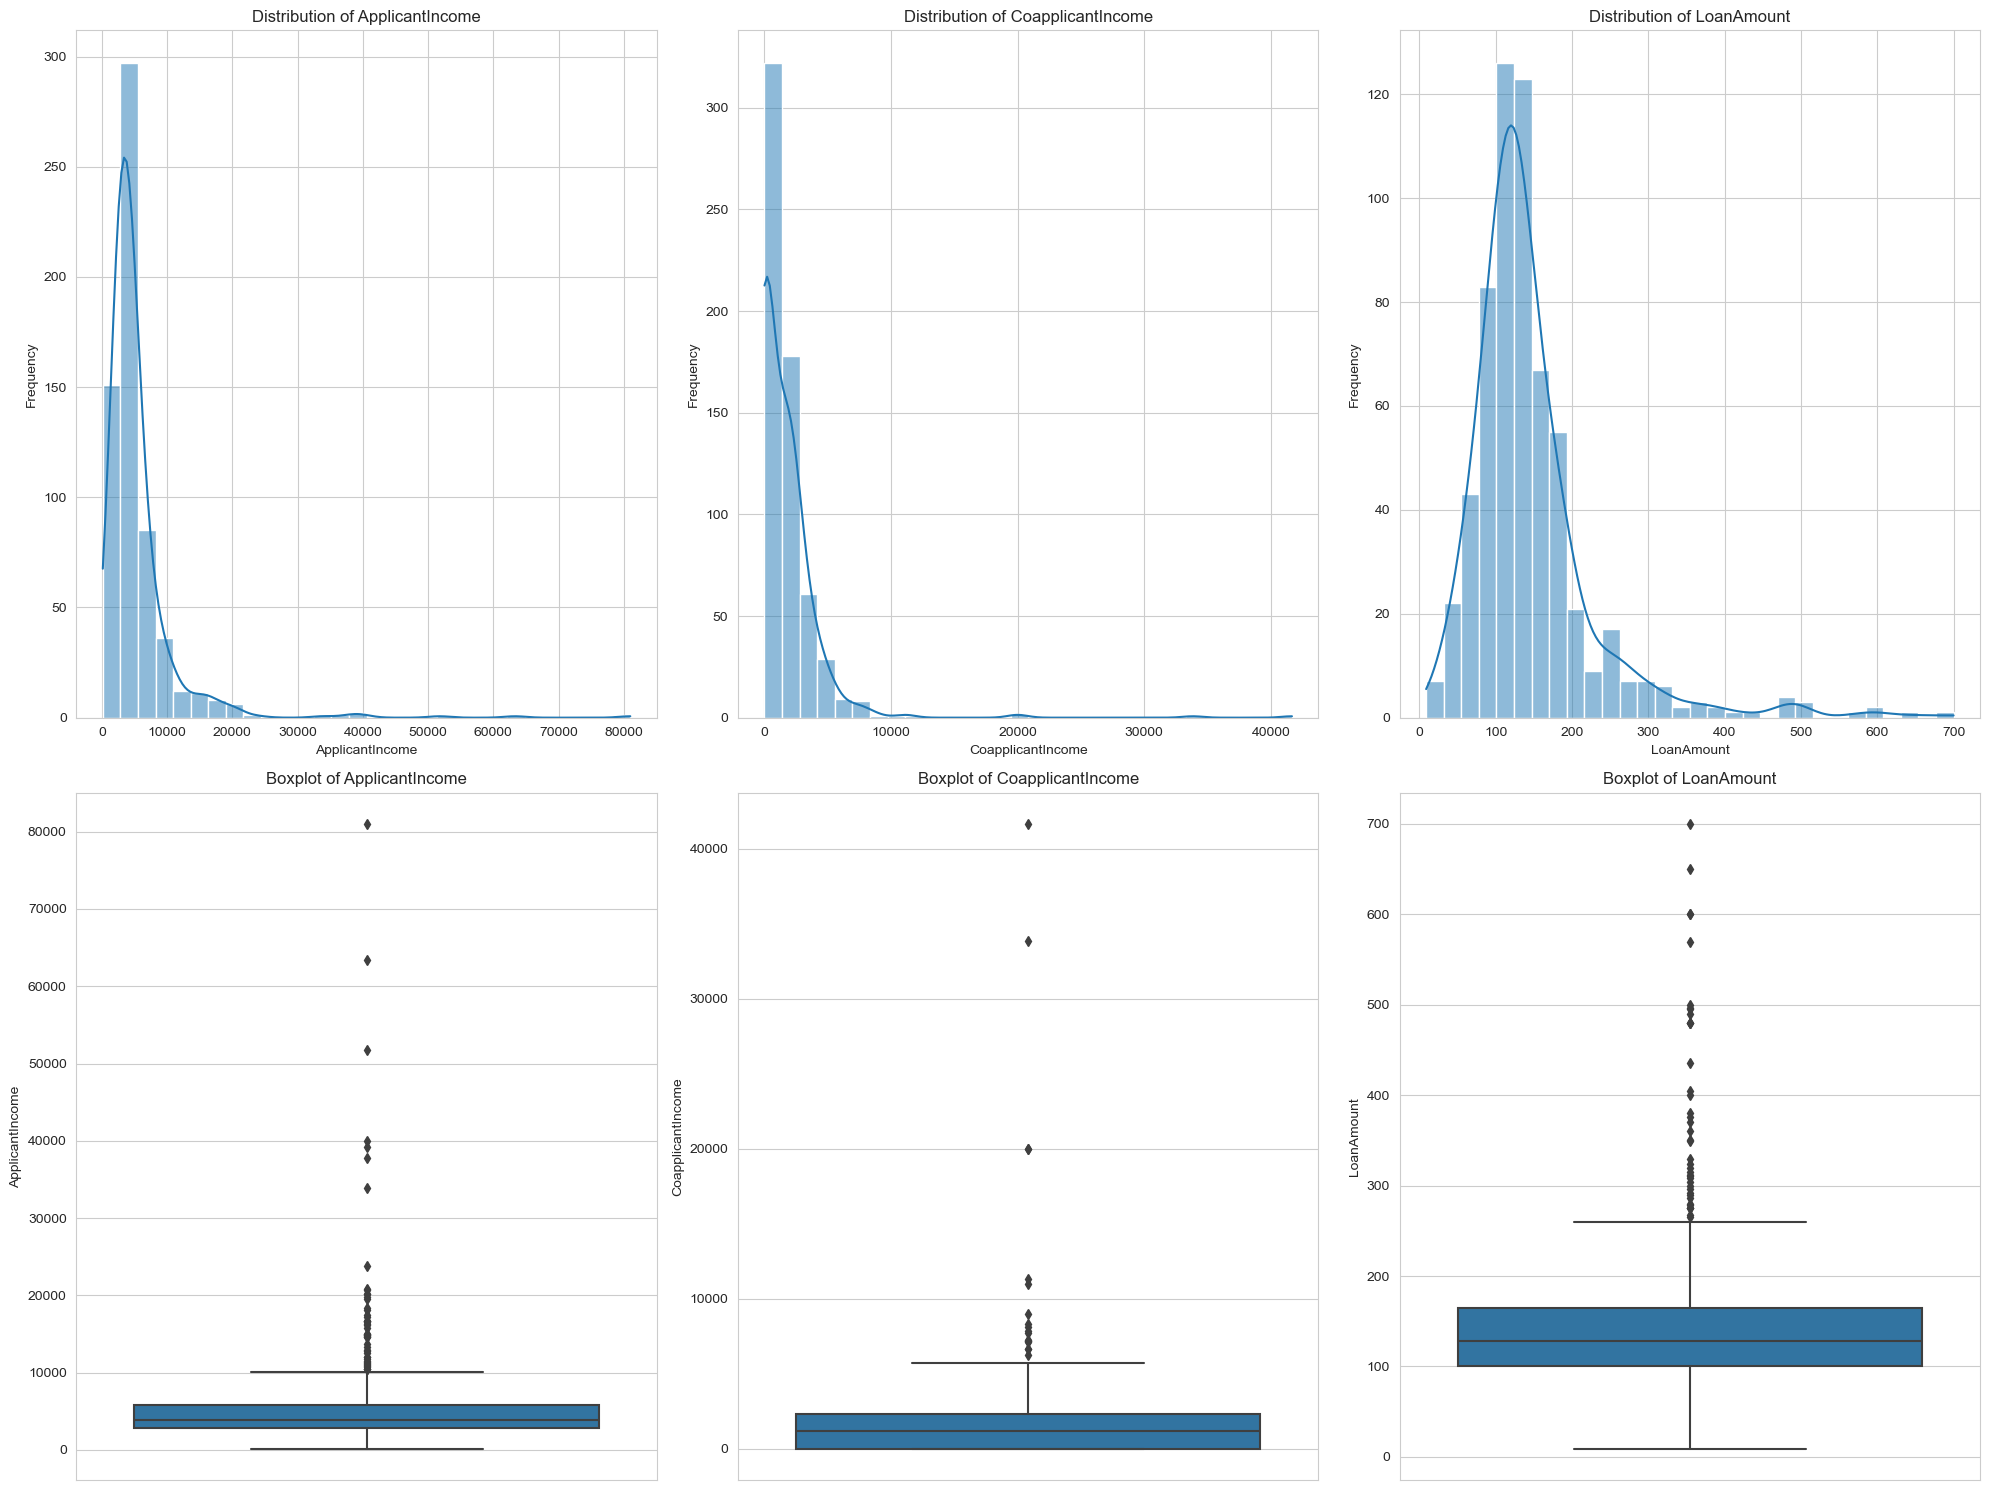

In [7]:
sns.set_style('whitegrid')

plt.figure(figsize=(20, 15))

features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

#Create subplots for each numerical column
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(train_df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
#Create boxplots to check for outliers
for i, feature in enumerate(features, i):
    plt.subplot(2,3, i+1)
    sns.boxplot(y=train_df[feature])
    plt.title(f'Boxplot of {feature}')
    
plt.tight_layout()
plt.show()

The distribution analysis reveals that the `ApplicantIncome` and `CoapplicantIncome` distributions are both right-skewed, suggesting that a majority of applicants and coapplicants possess lower incomes, while a minority exhibit notably higher incomes. Additionally, the `CoapplicantIncome` distribution highlights a substantial number of instances with zero income. In contrast, the `LoanAmount` distribution approximates a normal distribution but displays a mild right skew, indicating that the majority of loan amounts are concentrated around the median value, accompanied by a smaller number of comparatively larger loan amounts.

The box plot analysis for the variables reveals that `ApplicantIncome` exhibits several outliers on the higher income range, while `CoapplicantIncome` also shows a few outliers indicative of coapplicants with notably higher incomes. Furthermore, the `LoanAmount` box plot depicts the presence of outliers, implying the existence of loans with larger amounts compared to the majority of loan values.

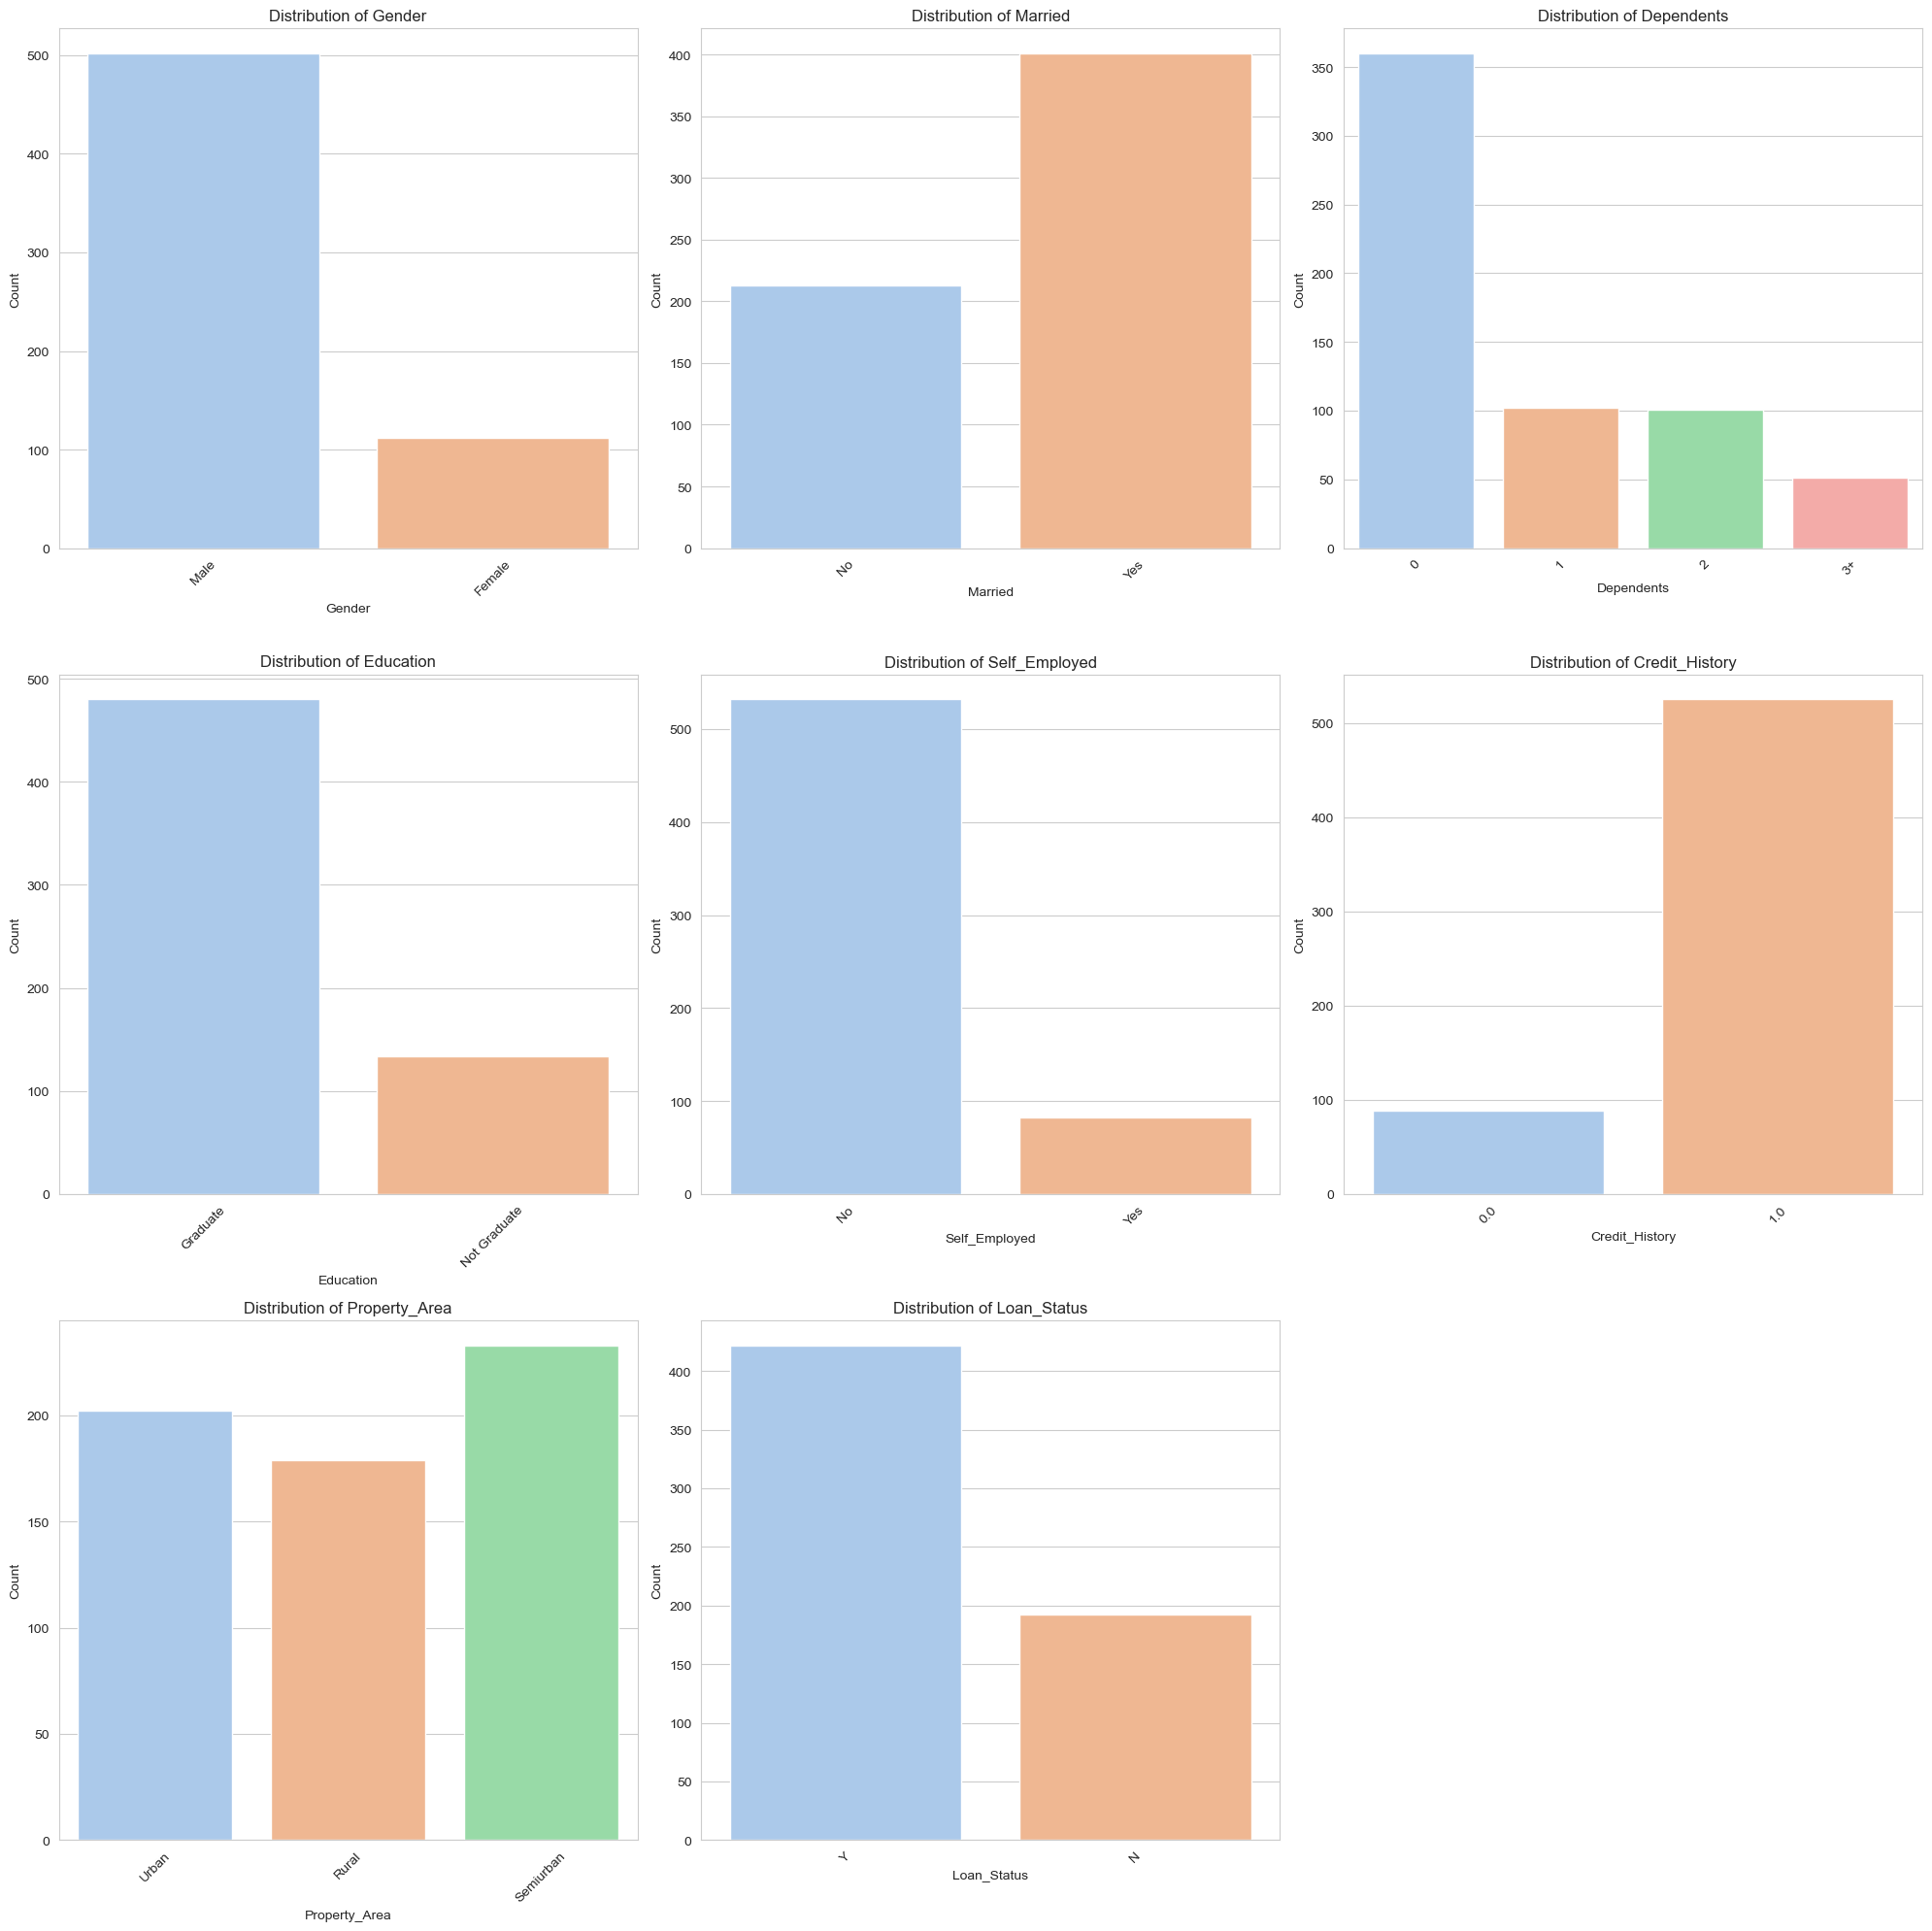

In [8]:
# Visualize the categorical columns

plt.figure(figsize=(20,20))

# Categorical columns to visualize
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=train_df[feature], palette='pastel')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

A comprehensive overview of the applicant demographics and characteristics reveals that a majority of applicants are `male` and `Married`. In terms of `Dependents`, a notable proportion have no dependents, while the distribution diminishes for 1, 2, and 3+ dependents. A significant majority are `graduates` and `not self-employed`, while the majority of applicants possess a credit history indicating good credit. Geographically, applicants are fairly evenly distributed across `Urban`, `Semiurban`, and `Rural` areas, with a slight inclination towards `Semiurban` locales. Remarkably, most loan applications receive approval, demonstrating a prevalent trend of successful loan outcomes.

# Data Preprocessing

In [9]:
train_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [10]:
# Use LabelEncoder for this categorical columns
from sklearn.preprocessing import LabelEncoder

var = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Education']
le = LabelEncoder()

for i in var:
    le.fit(train_df[i].unique())
    train_df[i] = le.transform(train_df[i])
    print(i, train_df[i].unique())

Gender [1 0]
Married [0 1]
Dependents [0 1 2 3]
Self_Employed [0 1]
Credit_History [1 0]
Education [0 1]


Gender: `Male` => 1, `Female` => 0 \
Married: `Yes` => 1, `No` => 0 \
Dependents: `0` => 0, `1` =>, `2` => 2, `3+` => 3 \
Self_Employed: `Yes` => 1, `No` => 0 \
Credit_History: `1.0` => 1, `0.0` => 0 \
Education: `Graduate` => 0, `Not Graduate` => 1

In [11]:
# Use OneHotEncoding for the Property_Area and Loan_Status, drop the first column of each data
dummies = pd.get_dummies(train_df[['Property_Area', 'Loan_Status']], prefix=['Property', 'Loan'], drop_first=True)
dummies

,Property_Semiurban,Property_Urban,Loan_Y
0,0,1,1
1,0,0,0
2,0,1,1
3,0,1,1
4,0,1,1
...,...,...,...
609,0,0,1
610,0,0,1
611,0,1,1
612,0,1,1


In [12]:
# Concat to the dataframe then drop, irrelevant data columns
train_df = pd.concat([train_df, dummies], axis=1).drop(['Loan_ID','Property_Area', 'Loan_Status'], axis=1)

In [13]:
train_df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Semiurban,Property_Urban,Loan_Y
0,1,0,0,0,0,5849,0.0,128.0,360.0,1,0,1,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,0,1,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,0,1,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,0,1,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1,0,1,1
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1,0,1,1
7,1,1,3,0,0,3036,2504.0,158.0,360.0,0,1,0,0
8,1,1,2,0,0,4006,1526.0,168.0,360.0,1,0,1,1
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1,1,0,0


# Scaling

In [14]:
# from sklearn.preprocessing import RobustScaler, MinMaxScaler

# scaler = RobustScaler()
# scale_var = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
# scaled_data_to_robust = scaler.fit_transform(train_df[scale_var])

# min_max_scaler = MinMaxScaler(feature_range=(-1, 1))

# train_df[scale_var] = min_max_scaler.fit_transform(scaled_data_to_robust)

In [15]:
train_df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Semiurban,Property_Urban,Loan_Y
0,1,0,0,0,0,5849,0.0,128.0,360.0,1,0,1,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,0,1,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,0,1,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,0,1,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1,0,1,1
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1,0,1,1
7,1,1,3,0,0,3036,2504.0,158.0,360.0,0,1,0,0
8,1,1,2,0,0,4006,1526.0,168.0,360.0,1,0,1,1
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1,1,0,0


## Correlation Matrix

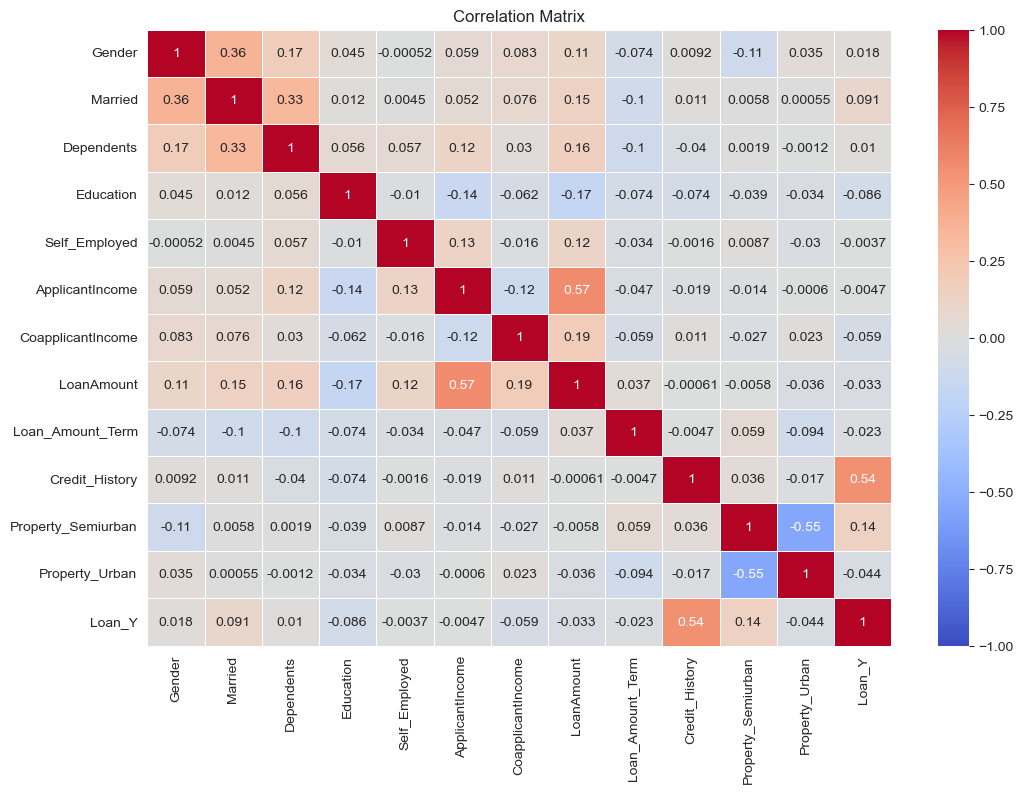

In [16]:
corr_matrix = train_df.corr()

#Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Train Test Split

In [17]:
# Assign features and target
X = train_df.drop(['Loan_Y'], axis=1)
y = train_df.Loan_Y

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Logistic Regression 

In [18]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_model.score(X_test, y_test)

0.8292682926829268

### Random Forest Classifier

In [19]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)
rfc_model.score(X_test, y_test)

0.8048780487804879

### Decision Tree Classifier

In [20]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_model.score(X_test, y_test)

0.7235772357723578

##### Without hyperparameter tuning, the most reliable model based on ther score was `LogisticRegression` with 82.9%

### Logistic Regression With Hyperparameter Tuning

In [21]:
# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],             # Regularization penalty ('l1' or 'l2')
    'C': np.logspace(-4, 4, 9),          # Inverse regularization strength
    'solver': ['liblinear', 'saga'],     # Optimization algorithm
    'max_iter': [100, 200, 300]          # Maximum number of iterations
}

grid_search = GridSearchCV(logreg_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

logreg_model_grid = grid_search.best_estimator_
logreg_model_grid

LogisticRegression(penalty='l1', solver='liblinear')

In [22]:
logreg_model_grid.score(X_test, y_test)

0.8455284552845529

### Decision Tree Classifier With Hyperparamater Tuning

In [23]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_leaf': [1,2,5],
    'random_state': [0, 42]
}
grid_search = GridSearchCV(tree_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
tree_model_grid = grid_search.best_estimator_
tree_model_grid

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [24]:
tree_model_grid.score(X_test, y_test)

0.8048780487804879

### Random Forest Classifier With Hyperparameter Tuning

In [26]:
# Define a parameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV with the RandomForestClassifier and parameter grid
grid_search = GridSearchCV(rfc_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
rfc_model_grid = grid_search.best_estimator_
rfc_model_grid

RandomForestClassifier(max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=5)

In [27]:
rfc_model_grid.score(X_test, y_test)

0.8455284552845529

##### With hyperparameter tuning, the `LogisticRegression` and `RandomForestClassifier` has the same score with 84.55%

## Metrics Report of all Three Models

In [35]:
# Make Predictions
logreg_pred = logreg_model_grid.predict(X_test)
tree_pred = tree_model_grid.predict(X_test)
rfc_pred = rfc_model_grid.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score

models = {
    'Logistic Regression': logreg_pred,
    'Decision Tree': tree_pred,
    'Random Forest': rfc_pred
}

metrics = ['Accuracy Score', 'Mean Absolute Error', 'R2 Score']

for model_name, predictions in models.items():
    print(f"Metrics of {model_name}")
    accuracy = accuracy_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    print(f"{metrics[0]}: {accuracy:.2f}")
    print(f"{metrics[1]}: {mae:.2f}")
    print(f"{metrics[2]}: {r2:.2f}")
    print()

Metrics of Logistic Regression
Accuracy Score: 0.85
Mean Absolute Error: 2.22
R2 Score: 0.25

Metrics of Decision Tree
Accuracy Score: 0.80
Mean Absolute Error: 10.52
R2 Score: 0.06

Metrics of Random Forest
Accuracy Score: 0.85
Mean Absolute Error: 2.22
R2 Score: 0.25



The `Logistic Regression` and `Random Forest` models demonstrate similar and favorable accuracy and MAE values, implying accurate and precise predictions. The `Decision Tree` model, although achieving a reasonable accuracy, exhibits larger errors and less explanatory power, as evidenced by its higher MAE and lower R2 score. Further analysis and tuning may be necessary to optimize the models' performance for this specific problem.

## Confusion Matrix for three models

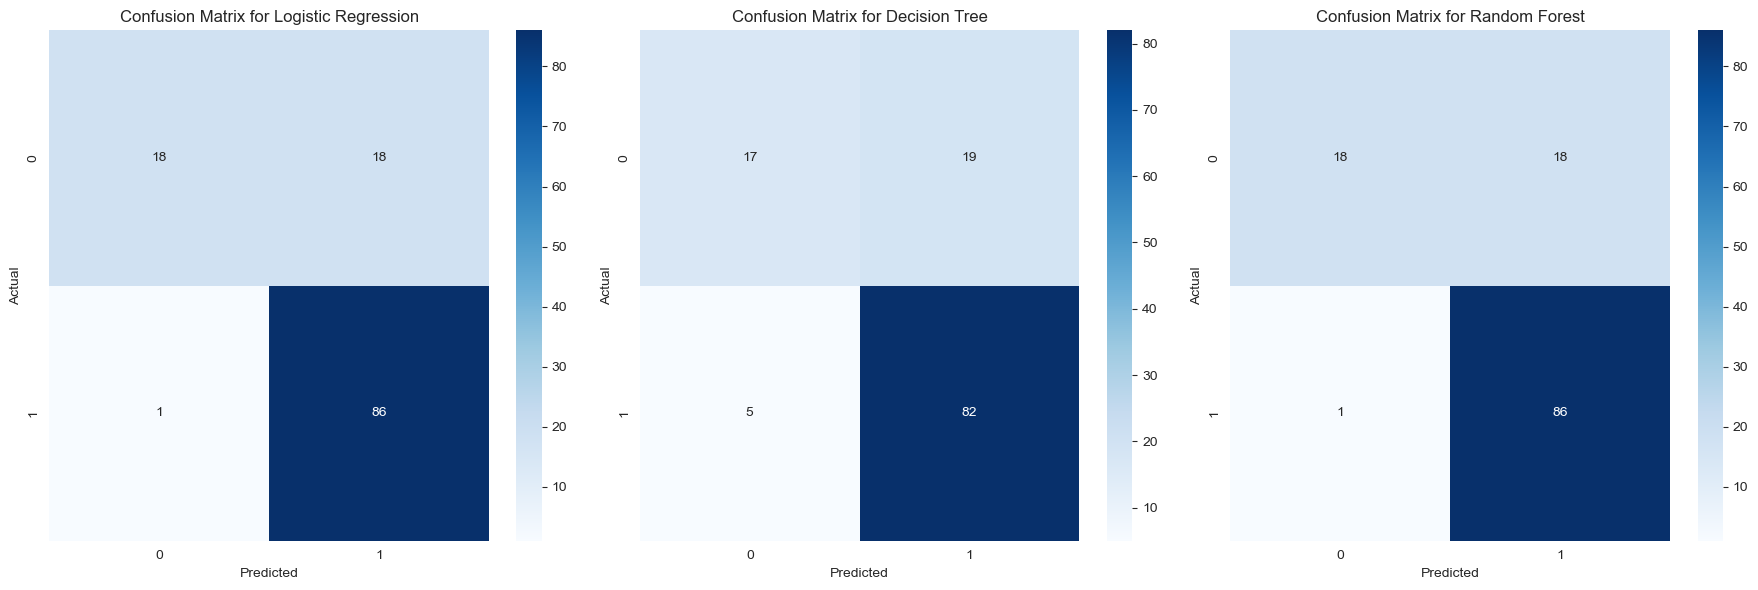

In [39]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(18, 6))

for i, (model_name, predictions) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')

plt.tight_layout()
plt.show()

Based on the confusion matrix, both `Logistic Regression` and `Random Forest` has the same value for their actual and predicted.

# Prediction using the test.csv file with new data

In [93]:
test_df = pd.read_csv('test.csv')
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [94]:
# Summary of the dataset
test_data_summary = {
    "Number of rows": test_df.shape[0],
    "Number of columns": test_df.shape[1],
    "Column data types": test_df.dtypes,
    "Basic statistical details": test_df.describe(include='all')
}

test_data_summary

{'Number of rows': 367,
 'Number of columns': 12,
 'Column data types': Loan_ID               object
 Gender                object
 Married               object
 Dependents            object
 Education             object
 Self_Employed         object
 ApplicantIncome        int64
 CoapplicantIncome      int64
 LoanAmount           float64
 Loan_Amount_Term     float64
 Credit_History       float64
 Property_Area         object
 dtype: object,
 'Basic statistical details':          Loan_ID Gender Married Dependents Education Self_Employed  \
 count        367    356     367        357       367           344   
 unique       367      2       2          4         2             2   
 top     LP001015   Male     Yes          0  Graduate            No   
 freq           1    286     233        200       283           307   
 mean         NaN    NaN     NaN        NaN       NaN           NaN   
 std          NaN    NaN     NaN        NaN       NaN           NaN   
 min          NaN    NaN   

In [95]:
#Categorical columns
categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
#Numerical columns
numerical_columns = ['LoanAmount', 'Loan_Amount_Term']


for column in categorical_columns:
    test_df[column].fillna(test_df[column].mode()[0], inplace=True)
    
for column in numerical_columns:
    test_df[column].fillna(test_df[column].median(), inplace=True)
    
#Check for the remaining missing values
remaining_missing_values = test_df.isnull().sum()

remaining_missing_values

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [96]:
# Use LabelEncoder for this categorical columns
from sklearn.preprocessing import LabelEncoder

var = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Education']
le = LabelEncoder()

for i in var:
    le.fit(test_df[i].unique())
    test_df[i] = le.transform(test_df[i])
    print(i, test_df[i].unique())

Gender [1 0]
Married [1 0]
Dependents [0 1 2 3]
Self_Employed [0 1]
Credit_History [1 0]
Education [0 1]


In [97]:
# Use OneHotEncoding for the Property_Area and Loan_Status, drop the first column of each data
dummies = pd.get_dummies(test_df['Property_Area'], prefix='Property', drop_first=True)
# Concat to the dataframe then drop, irrelevant data columns
final_test_df = pd.concat([test_df, dummies], axis=1).drop(['Loan_ID','Property_Area'], axis=1)

In [100]:
logreg_preds = logreg_model_grid.predict(final_test_df)
tree_preds = tree_model_grid.predict(final_test_df)
rfc_preds = tree_model_grid.predict(final_test_df)



output= pd.DataFrame({'Loan_ID':test_df['Loan_ID'],'LogReg_Pred':logreg_preds, 'DecisionTree_Pred': tree_preds, 'RandomForest_Pred': rfc_preds})
output.head(20)

,Loan_ID,LogReg_Pred,DecisionTree_Pred,RandomForest_Pred
0,LP001015,1,1,1
1,LP001022,1,1,1
2,LP001031,1,1,1
3,LP001035,1,1,1
4,LP001051,1,1,1
5,LP001054,1,1,1
6,LP001055,1,1,1
7,LP001056,0,0,0
8,LP001059,1,1,1
9,LP001067,1,1,1


##### Above are my model predictions for the new data in the test.csv file, we can see the difference of the predictions in the dataframe, but overall it is good ( I think!).

### Feel free to feedback so that I can improve my model performance